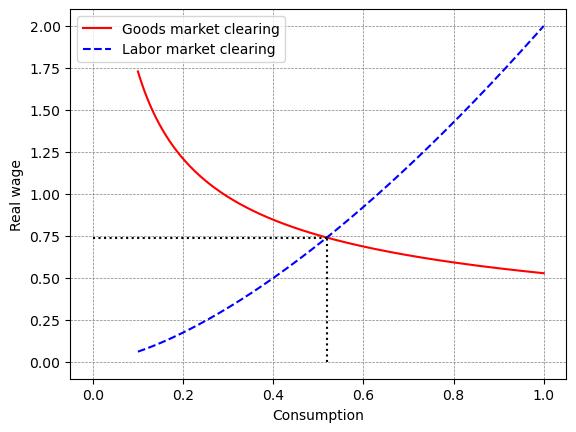

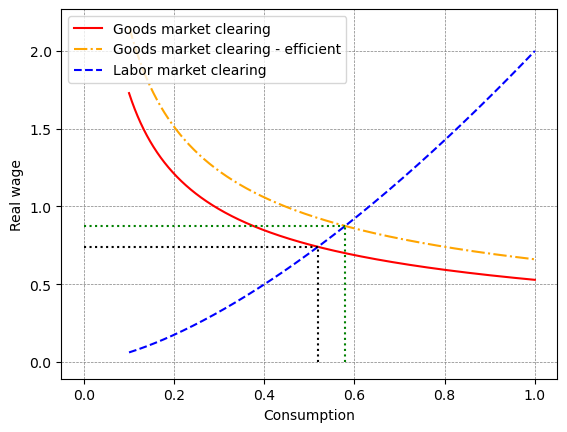

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Sep 16 08:03:39 2022

@author: qwp970
"""

import numpy as np
import matplotlib.pyplot as plt

vecl= 1000
cvec = np.linspace(0.1,1,vecl)

## Returns to labor in production
α = .66

## Elasticity of substitution in consumption
θ = 5       ## Monopolistic competition
θ1 = 10000  ## Perfect competition

## Elasticity of substitution between consumption and real money
γ = 0.5

## Inverse Frisch elasticity
ϕ = 2

## Multiplier in labor market clearing
κ = 1/((1-γ)**(1-γ) * γ**γ)

###############################################################################
#### Equilibrium conditions
### Labor market clearing
w_l = κ * cvec**((ϕ-1)/α)

### Goods market clearing
w_g = α*(θ-1)/θ * cvec**((α-1)/α)

### Goods market clearing with perfect competition
w_g_eff = α*(θ1-1)/θ1 * cvec**((α-1)/α)

################################################################################
##### Demand system
#P = (θ/(θ-1))
#C = 1
#W = 1
#pvec = np.linspace(1,2,vecl)
### Demand function
#D = (pvec/P)**(- θ) * C 
#
### Marginal revenue function
#MR = -(1-θ)*(pvec/P)**(- θ-1) * C 
#
### Marginal cost
#MC = -(-θ)*(pvec/P)**(- θ) * C * W/pvec
#plt.plot(pvec, D)
#plt.plot(pvec,MR)
#plt.plot(pvec,MC)

###############################################################################
#### Equilibrium quantities
## Consumption
C_eq     = ( κ/α * θ /(θ -1) ) ** (α/(α-ϕ))
C_eq_eff = ( κ/α * θ1/(θ1-1) ) ** (α/(α-ϕ))

## Real wage
w_eq     = κ * C_eq    **((ϕ-1)/α)
w_eq_eff = κ * C_eq_eff**((ϕ-1)/α)

###############################################################################
#### Plotting
plt.figure()
plt.plot(cvec, w_g, label = 'Goods market clearing', color = 'red')
plt.plot(cvec, w_l, label = 'Labor market clearing', color = 'blue', linestyle = 'dashed')
plt.xlabel('Consumption')
plt.ylabel('Real wage')
plt.vlines(C_eq, 0, w_eq,color = 'black', linestyle = 'dotted')
plt.hlines(w_eq, 0, C_eq,color = 'black', linestyle = 'dotted')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend(loc = 'upper left')
plt.savefig('equil.pdf')
 
### Without distortion
plt.figure()
plt.plot(cvec, w_g, label = 'Goods market clearing', color = 'red')
plt.plot(cvec, w_g_eff, label = 'Goods market clearing - efficient', color = 'orange', linestyle = '-.')
plt.plot(cvec, w_l, label = 'Labor market clearing', color = 'blue', linestyle = 'dashed')
plt.xlabel('Consumption')
plt.ylabel('Real wage')
plt.vlines(C_eq, 0, w_eq,color = 'black', linestyle = 'dotted')
plt.hlines(w_eq, 0, C_eq,color = 'black', linestyle = 'dotted')
plt.vlines(C_eq_eff, 0, w_eq_eff,color = 'green', linestyle = 'dotted')
plt.hlines(w_eq_eff, 0, C_eq_eff,color = 'green', linestyle = 'dotted')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend(loc = 'upper left')
plt.savefig('equil_eff.pdf')









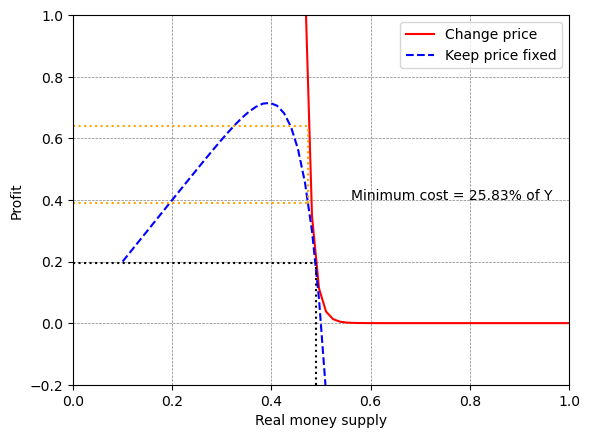

In [2]:
## Inverse Frisch elasticity
ϕ = 11

###############################################################################
###############################################################################
## Profits with and without adjustment frictions

Mvec = np.linspace(0.1,1.5,100)
P=1
Pi_adj = 1/(θ-1) * (θ/(θ-1))**(-θ) * (κ*Mvec/P)**((1+(1-θ)*(ϕ-1)))

Pi_fix = κ*Mvec/P - (κ*Mvec/P)**ϕ

equil = ((θ-1)/θ)**(1/(ϕ-1))-((θ-1)/θ)**(ϕ/(ϕ-1))
Meq =  ((θ-1)/θ)**(1/(ϕ-1))/κ
Pieq = κ*Meq/P - (κ*Meq/P)**ϕ

###############################################################################
## Decrease in Money supply such that output falls by 3%
Meq_fall =  ((θ-1)/θ)**(1/(ϕ-1))/κ * (.97) #<----- This governs the fall in output


Pieq_fall_adj = 1/(θ-1) * (θ/(θ-1))**(-θ) * (κ*Meq_fall/P)**((1+(1-θ)*(ϕ-1)))
Pieq_fall_fix = κ*Meq_fall/P - (κ*Meq_fall/P)**ϕ

cost = (Pieq_fall_adj-Pieq_fall_fix)/(κ*Meq/P)
###############################################################################
#### Plotting
plt.figure()
plt.plot(Mvec, Pi_adj, label = 'Change price', color = 'red')
plt.plot(Mvec, Pi_fix, label = 'Keep price fixed', color = 'blue', linestyle = 'dashed')
plt.xlabel('Real money supply')
plt.ylabel('Profit')
plt.vlines(Meq, -0.2, Pieq,color = 'black', linestyle = 'dotted')
plt.hlines(Pieq, 0, Meq,color = 'black', linestyle = 'dotted')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

plt.hlines(Pieq_fall_adj, 0, Meq_fall,color = 'orange', linestyle = 'dotted')
plt.hlines(Pieq_fall_fix, 0, Meq_fall,color = 'orange', linestyle = 'dotted')
plt.vlines(Meq_fall, Pieq_fall_fix, Pieq_fall_adj,color = 'orange', linestyle = 'dotted')

plt.xlim((0, 1))
plt.ylim((-0.2, 1))
plt.text(0.56,0.4,'Minimum cost = {:2.2%} of Y'.format(cost))
plt.legend()
plt.savefig('adjromer_calibration.pdf')
#plt.close()





